# Temporal and Spatial DataMining

## Exercise_05_Similarity - Intro

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from matplotlib import cm
plt.style.use('ggplot')

/Users/Aleyna/anaconda3/envs/e2ml-env/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
class ExampleClass:
    def __init__(self):
        print('I run when we create an object.')
        # Saving a variable with `self.var = var` enables other methods in a class
        # to have access to that variable.
        self.variable = 'I am a variable.'       
        
    def __call__(self):
        print('I run when the object is called')
        
    def some_method(self):
        print('The variable can be accessed in this method:', self.variable)
        print('I am a method.')
        
obj = ExampleClass() # Create object out of class, calls the __init__ method
obj()                # Call the object, runs the __call__ method
obj.some_method()    # Call some_method from the object.
obj.variable         # Get the value of the variable defined in the object.

I run when we create an object.
I run when the object is called
The variable can be accessed in this method: I am a variable.
I am a method.


'I am a variable.'

### Task 1: Distance calculation

The euclidean distance of two vectors is defined as:
$$d(\mathbf{X}, \mathbf{Y})=\|\mathbf{X}-\mathbf{Y}\|_{2}=\sqrt{\left(x_{1}-y_{1}\right)^{2}+\cdots+\left(x_{n}-y_{n}\right)^{2}}=\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}$$


The euclidean distance is a special form of the <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm">p-norm</a>:

\begin{align}
D_{p}(\mathbf{X}, \mathbf{Y}) = (\sum_{i=1}^{N}|x_i-y_i|^{p})^{\frac{1}{p}}
\end{align}

**a)** Create the class `PNorm` that gets the value of $p$ as an initialization parameter. The `__call__` method should have two vectors as input arguments and return their distance.

In [3]:
class PNorm:
    def __init__(self, p):
        """Initialization of PNorm."""
        self.p = p
    
    def __call__(self, u, v):
        """Call method that determines the distance between u and v."""
        return (np.sum((u-v)**self.p))**(1/self.p)

**b)** Calculate the Manhattan distance (p=1) and Euclid distance (p=2) between X1 and X2:

In [4]:
np.random.seed(0)
X1 = np.random.rand(10)
X2 = np.random.rand(10)

In [5]:
manh_dist = PNorm(p=1)
euc_norm = PNorm(p=2)

print("Manhattan distance between X1 and X2:", manh_dist(X1, X2))
print("Euclidean distance between X1 and X2:", euc_norm(X1, X2))

Manhattan distance between X1 and X2: 0.6842291758389014
Euclidean distance between X1 and X2: 1.0607908079366692


The [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) of two vectors $\mathbf{u}$, $\mathbf{v}$ given a covariance matrix $\mathbf{S}$ is given by:
$$\Delta(\mathbf{u}, \mathbf{v}) =  \sqrt{(\mathbf{u}-\mathbf{v})^T\mathbf{S}^{-1}(\mathbf{u}-\mathbf{v})}$$

A covariance matrix is a symmetric, positive semidefinite matrix. Use the provided matrix S:
$S=\begin{pmatrix}1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$

**c)** Implement a class `Mahalanobis` that gets the matrix of $\mathbf{S}$ as an initialization parameter. The call method should get two vectors and return their distance:

In [6]:
class Mahalanobis:
    def __init__(self, S):
        self.S = S
        self.S_inv = np.linalg.inv(self.S)

    def __call__(self, u, v):
        return np.sqrt((u-v).T @ self.S_inv @ (u-v))

In [7]:
S = [[1, .5], [.5, 1]]

a, b = np.array([1, 2]), np.array([2, 1])
mahalanobis_dist = Mahalanobis(S=S)
mahalanobis_dist(a, b) # should return 2

2.0

The scaled Euclidean distance (based on the matrix norm) is given by: 

\begin{align}
D_{M}(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x}-\mathbf{y})^{T}\mathbf{M}(\mathbf{x}-\mathbf{y}))}
\end{align}

with the Matrix norm:

\begin{align}
\mathbf{M} = \left(\frac{1}{N-1}\sum_{k=1}^{N}(x_k-\mu)(x_k-\mu)^{T}\right)^{-1}
\end{align}

and the mean value $$\mu = \frac{1}{N}\sum_{k=1}^{N}x_k$$. 

**c)** Implement scaled Euclidean distance in python and calculate the distance $D_{M}(\mathbf{x}_1, \mathbf{x}_2)$:

>with $x_k$ is the $k_{th}$ sample, and $N=2$.

>consider using the right dimensions

$$\mathbf{x}_1, \mathbf{x}_2 \in \mathbb{R}^n \text{ , } \mathbf{M} \in \mathbb{R}^{n \times n} \text{ and } n=10$$

In [70]:
class scaled_Euclid_distance():
    
    def __init__(self, X):
        """ initialization using all samples """
        self.M = self.calculate_M(X)
    
    def calculate_M(self, X):
        mu = np.mean(X, axis=0)
        N = X.shape[0]
        cov = 1/(N-1) * np.sum([(X[i, :] - mu).reshape(-1,1) @ (X[i, :] - mu).reshape(-1,1).T for i in range(N)], axis=1)
        print(cov)
        return np.linalg.inv(cov)
        
    def __call__(self, X, Y):
        return np.sqrt((X-Y)).T @ self.M @ (X-Y)
    

In [73]:
X = np.concatenate((X1.reshape(1,-1), X2.reshape(1,-1)), axis=0)
print(f'X shape: {X.shape}')

mu = np.mean(X, axis=0)
print(f'mu shape: {mu.shape}')

np.sum([(X[i,:] - mu).reshape(-1,1) @ (X[i, :] - mu).reshape(-1,1).T for i in range(2)], axis=1).shape

scl_euc = scaled_Euclid_distance(X)

X shape: (2, 10)
mu shape: (10,)
[[-0.04155179  0.03186702  0.00593891 -0.06512381  0.06031801  0.0955808
   0.07139398  0.01011858  0.03173216 -0.08323146]
 [-0.04155179  0.03186702  0.00593891 -0.06512381  0.06031801  0.0955808
   0.07139398  0.01011858  0.03173216 -0.08323146]]


LinAlgError: Last 2 dimensions of the array must be square

In [74]:
print("scaled Euclid distance:", scl_euc(X1, X2))

/var/folders/0p/nmvxp1px72q3ml7745bcbn9m0000gn/T/ipykernel_7946/1527106681.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((X-Y)).T @ self.M @ (X-Y)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 10)

**d)** Implement following distance measure:

*Cosine distance:* Normalized standard scalar product of two vectors (cosine of the angle):
	
$$d(\mathbf{x},\mathbf{y}) := \frac{\langle \mathbf{x} \vert \mathbf{y} \rangle}{||\mathbf{x}||\cdot||\mathbf{y}||}$$
Note: another notation for $\langle \mathbf{x} \vert \mathbf{y} \rangle$ is $\mathbf{x}^{\textrm{T}} \mathbf{y}$.

In [ ]:
def cosine_dist(x, y):
    return (x.T * y) / (norm(x) * norm(y))

### Task 2: Plotting
Plotting is an essential tool for data visualization. 

> Use the provided `plot_distances` function to visualize your previously implemented distance functions.
> The `plot_distance` function takes an arbitrary distance function as input, which itself has two input arguments.

In [ ]:
def plot_distances(distf, base=np.array([0,0])):
    """
    Plot level contours of given distance function **distf** around the development point **base**

    Parameters:
    ===========
    distf - (x,y) -> d A function taking two arrays and returning a positive distance measure.

    base - base point to develop the contour lines around.
    """
    X, Y = np.mgrid[-3:3:0.1, -3:3:0.1]
    Z = np.zeros_like(X)

    for i,_ in enumerate(X):
        for j,_ in enumerate(Y):
            x = X[i,j]
            y = Y[i,j]
            pt = np.asarray([x,y])
            Z[i,j] = distf(pt, base)

    levels = np.arange(0,6,0.25)

    CS = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.grid(True)

**a)** For the p-norm try different values for the value of `p` and plot the distance using the method `plot_distance`.

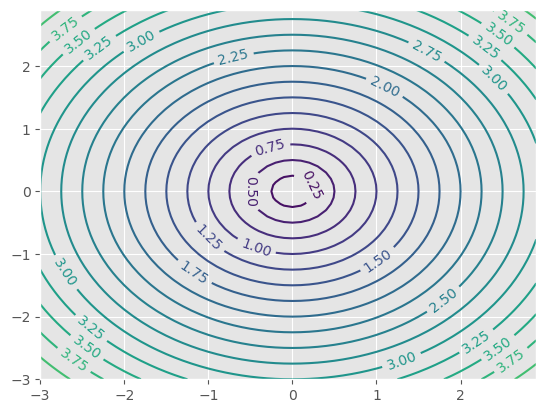

In [ ]:
plot_distances(PNorm(p=2))

**b)** For the Mahalanobis distance try different values for the covariance matrix `S` and plot the distance using the method `plot_distance`. 

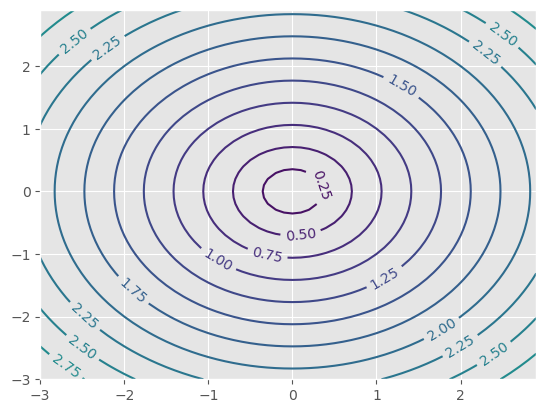

In [ ]:
S = np.eye(2,2)
S = np.array([[2,0], [0,2]])
plot_distances(Mahalanobis(S))